# The Porto Seguro kaggle challenge

## 1. Data Description

In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., `ind` , `reg`, `car`, `calc`). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

## 2. File descriptions

- `train.csv` contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.
- `test.csv` contains the test data.

## 3. Aim

- Build a classifier using the training dataset that leads to a good ROC and Precision / Recall curve on the testing set
- The notebook should describe your steps, explain what you do and should run entirely without bugs. It should contain some descriptive statistics and quick study, to understand some things about the data...
- It must end with plots of the ROC and precision/recall curves obtained on the testing dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 4. Preparation of the dataset for learning

In [ ]:
# Use the path to your filename
path = 'C:\\Users\\achir_zgtpmg8\\Desktop\\challenge'
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))
train.head()
train.describe()

##  a - Correlation plot

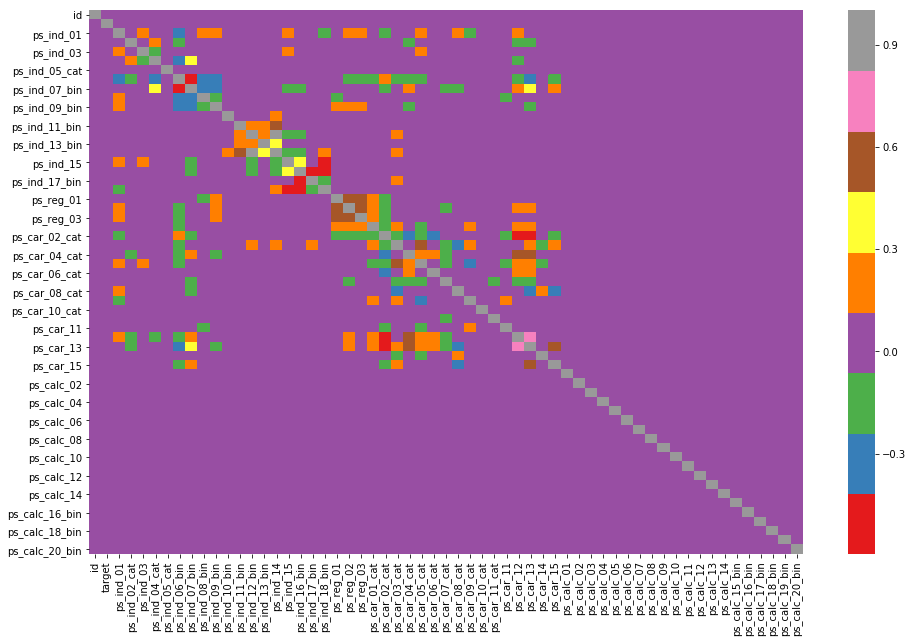

In [3]:
# correlation plot
cor = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor,cmap='Set1')

## b - Handling imbalanced classes

0    573518
1     21694
Name: target, dtype: int64

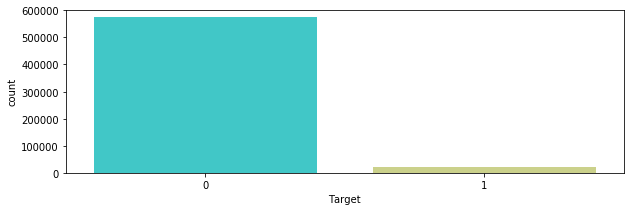

In [4]:
plt.figure(figsize=(10,3))
sns.countplot(train['target'],palette='rainbow')
plt.xlabel('Target')

train['target'].value_counts()

## c - Data Quality Checks

In [5]:
#
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missing values


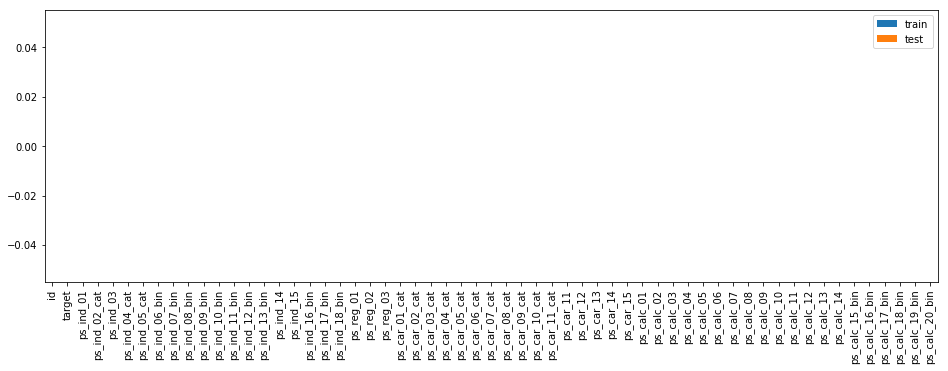

In [16]:
k= pd.DataFrame()
k['train']= train.isnull().sum()
k['test'] = test.isnull().sum()
fig,ax = plt.subplots(figsize=(16,5))
k.plot(kind='bar',ax=ax) # Je comprend pas pourquoi il affiche pas les histogrammes en bleu et orange sur le graphe ?

## d- Exploratory Data Visualization

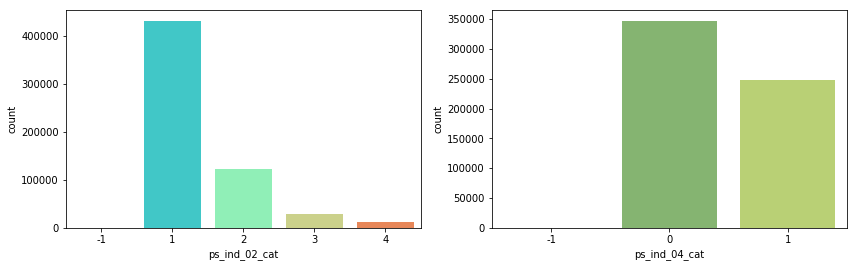

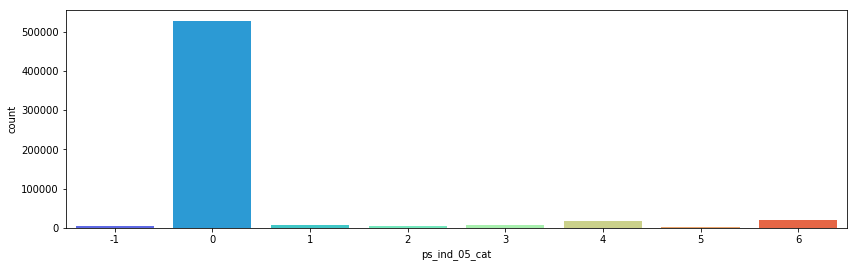

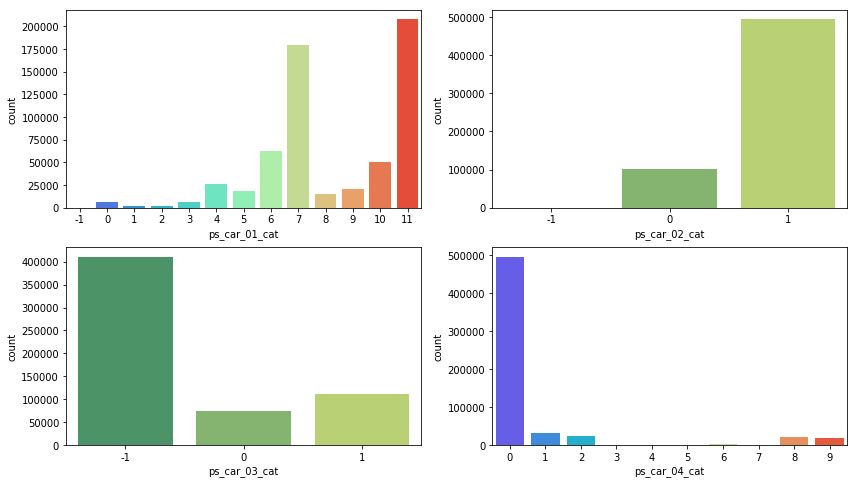

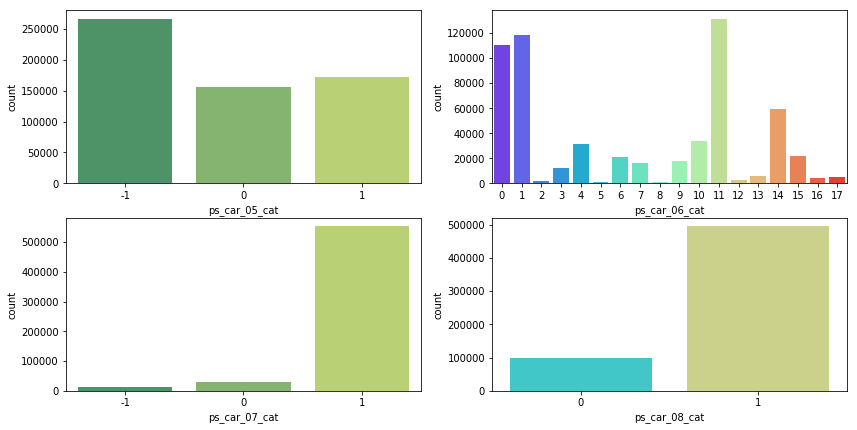

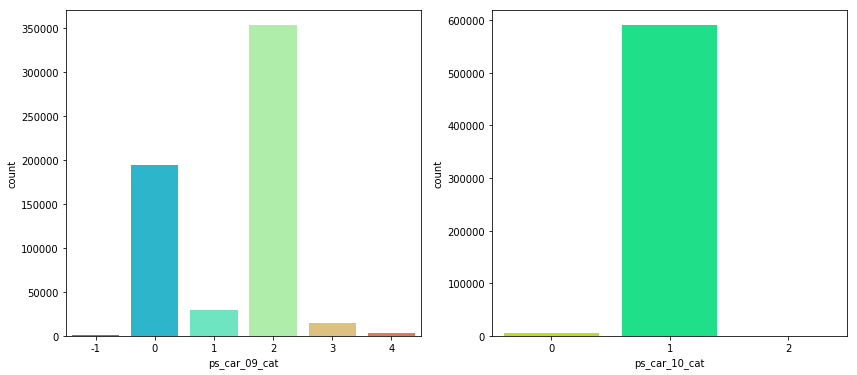

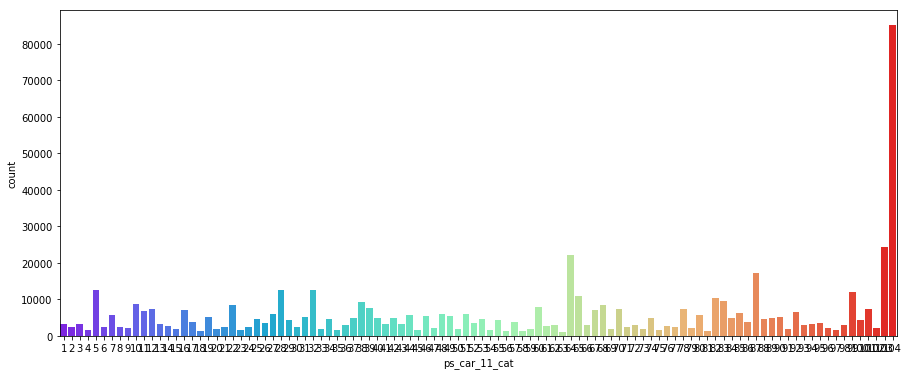

In [7]:
fig ,ax = plt.subplots(1,2,figsize=(14,4))
ax1,ax2, = ax.flatten()
sns.countplot(train['ps_ind_02_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_04_cat'],palette='summer',ax=ax2)
fig,ax = plt.subplots(figsize=(14,4))
sns.countplot(train['ps_ind_05_cat'],palette='rainbow',ax=ax)

fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train['ps_car_01_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_car_02_cat'],palette='summer',ax=ax2)
sns.countplot(train['ps_car_03_cat'],palette='summer',ax=ax3)
sns.countplot(train['ps_car_04_cat'],palette='rainbow',ax=ax4)

fig,ax = plt.subplots(2,2,figsize = (14,7))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train['ps_car_05_cat'],palette='summer',ax=ax1)
sns.countplot(train['ps_car_06_cat'],palette='rainbow',ax=ax2)
sns.countplot(train['ps_car_07_cat'],palette='summer',ax=ax3)
sns.countplot(train['ps_car_08_cat'],palette='rainbow',ax=ax4)

fig, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.countplot(train['ps_car_09_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_car_10_cat'],palette='gist_rainbow',ax=ax2)
fig,ax = plt.subplots(figsize=(15,6))
sns.countplot(train['ps_car_11_cat'],palette='rainbow',ax=ax)



In [ ]:
# -1 means nan in this case...so put nan back
X_train = train.replace(-1, np.NaN)
X_test = test.replace(-1, np.NaN)

# concatenate train and test to deal with nan together
Xmat = pd.concat([X_train, X_test])

# There are binary predictors...let's see if they are skewed or evenly distributed.
In [4]:
# some of binary variables can be skewed
bin_col = [col for col in Xmat.columns if '_bin' in col]
counts = []
for col in bin_col:
    counts.append(100*(Xmat[col]==1).sum()/Xmat.shape[0])

ax = sns.barplot(x=counts, y=bin_col, orient='h')
ax.set(xlabel="% of 1 in a column")
plt.show()

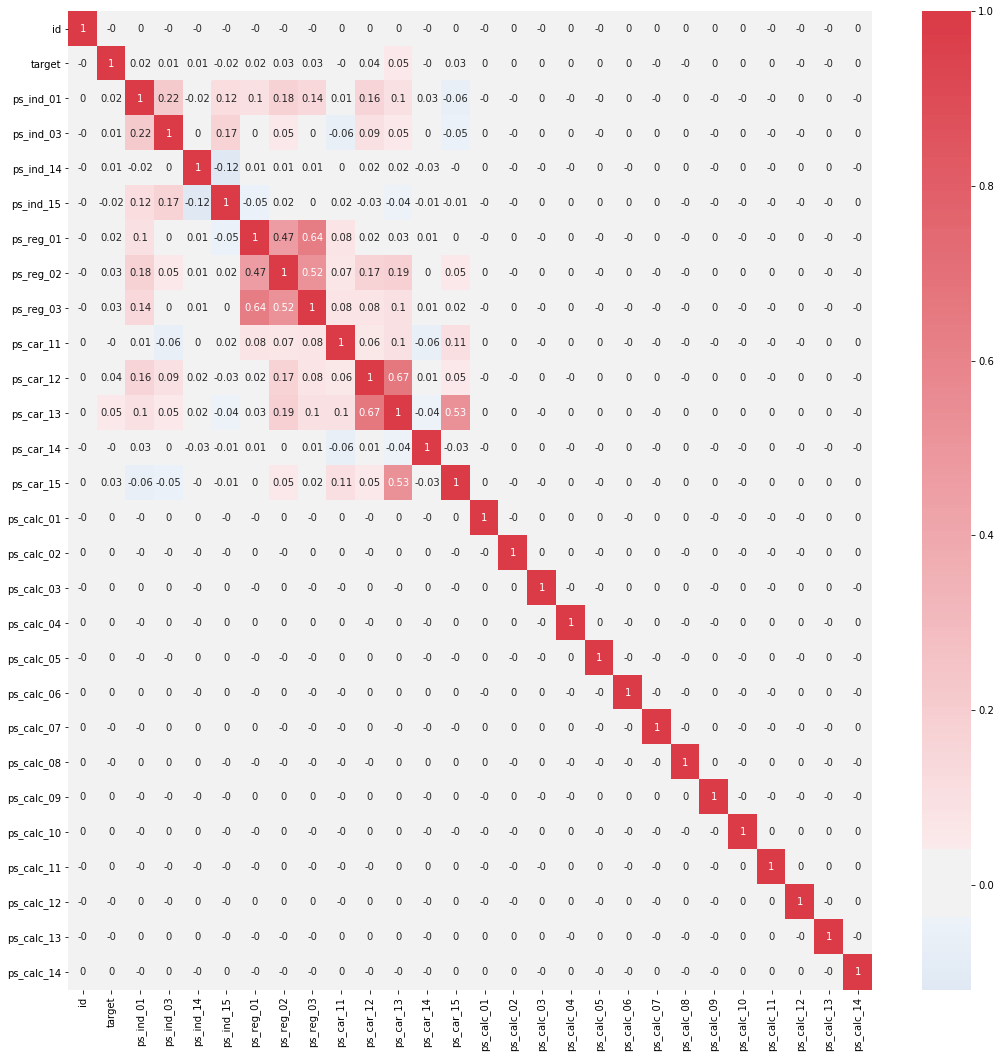

In [9]:
### Corralation matrix heatmap
# Getting correlation matrix
# Numeric Features
numeric_features = [x for x in train.columns.tolist()if x[-3:] not in ['bin', 'cat']]
cor_matrix = train[numeric_features].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

In [10]:
s = train.sample(frac=0.1)

### ps_reg_02 and ps_reg_03

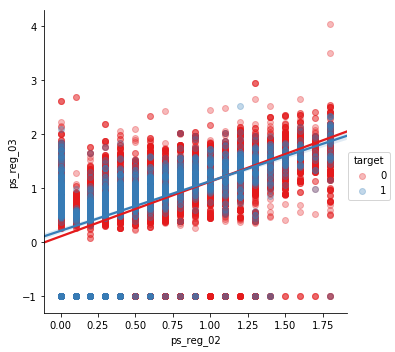

In [11]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

### ps_car_12 and ps_car_13


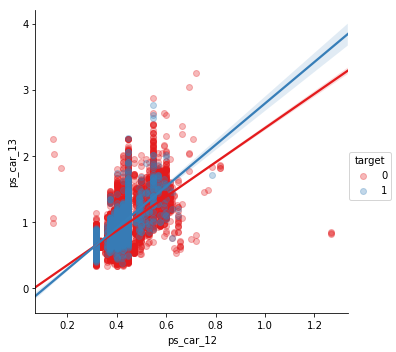

In [12]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### Remark

## e - Processing of the Data 

In [17]:
# extracting target column and dropping target and id from training dataset
target = train['target'].values
id_test = test['id'].values
train = train.drop(['target', 'id'], axis = 1)
test = test.drop(['id'], axis = 1)

In [ ]:
# processing missing values
#train = train.replace(-1, np.nan)
#test = test.replace(-1, np.nan)

# processing categorical features
cat_featnames = [a for a in train.columns if a.endswith('cat')]
for feature in cat_featnames:
    tmp = pd.get_dummies(pd.Series(train[feature]))
    train = pd.concat([train,tmp],axis=1)
    train = train.drop([feature],axis=1) 
for feature in cat_featnames:
    tmp = pd.get_dummies(pd.Series(test[feature]))
    test = pd.concat([test,tmp],axis=1)
    test = test.drop([feature],axis=1)

In [11]:
(n_samples,_) = train.values.shape
n_samples

595212

## 5. Ensemble learning

In [12]:
# Adapted from https://www.kaggle.com/yekenot/simple-stacker-lb-0-284

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

class Ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits
        self.stacker = stacker
        self.base_models = base_models
        self.y_pred = np.empty([1,1])

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=2016).split(X, y))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):

            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
#                y_holdout = y[test_idx]

                print ("Fit %s fold %d" % (str(clf).split('(')[0], j+1))
                clf.fit(X_train, y_train)
                cross_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
                print("    cross_score: %.5f" % (cross_score.mean()))
                y_pred = clf.predict_proba(X_holdout)[:,1]                

                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict_proba(T)[:,1]
            S_test[:, i] = S_test_i.mean(axis=1)

        results = cross_val_score(self.stacker, S_train, y, cv=3, scoring='roc_auc')
        print("Stacker score: %.5f" % (results.mean()))

        self.stacker.fit(S_train, y)
        self.y_pred = self.stacker.predict_proba(S_test)[:,1]
        return self.y_pred

In [11]:
# LightGBM params
lgb_params = {}
lgb_params['learning_rate'] = 0.02
lgb_params['n_estimators'] = 650
lgb_params['max_bin'] = 10
lgb_params['subsample'] = 0.8
lgb_params['subsample_freq'] = 10
lgb_params['colsample_bytree'] = 0.8   
lgb_params['min_child_samples'] = 500
lgb_params['random_state'] = 99

lgb_params2 = {}
lgb_params2['n_estimators'] = 1090
lgb_params2['learning_rate'] = 0.02
lgb_params2['colsample_bytree'] = 0.3   
lgb_params2['subsample'] = 0.7
lgb_params2['subsample_freq'] = 2
lgb_params2['num_leaves'] = 16
lgb_params2['random_state'] = 99

lgb_params3 = {}
lgb_params3['n_estimators'] = 1100
lgb_params3['max_depth'] = 4
lgb_params3['learning_rate'] = 0.02
lgb_params3['random_state'] = 99

In [12]:
# Models

lgb_model = LGBMClassifier(**lgb_params)

lgb_model2 = LGBMClassifier(**lgb_params2)

lgb_model3 = LGBMClassifier(**lgb_params3)

ada_model = AdaBoostClassifier()

log_model = LogisticRegression()

### Training the model

In [13]:
stack = Ensemble(n_splits=3,
        stacker = log_model,
        base_models = (lgb_model, lgb_model2, lgb_model3, ada_model,
                       log_model
                      ))        
        
y_pred = stack.fit_predict(train, target, train)

Fit LGBMClassifier fold 1
    cross_score: 0.63982
Fit LGBMClassifier fold 2
    cross_score: 0.63675
Fit LGBMClassifier fold 3
    cross_score: 0.63655
Fit LGBMClassifier fold 1
    cross_score: 0.64032
Fit LGBMClassifier fold 2
    cross_score: 0.63816
Fit LGBMClassifier fold 3
    cross_score: 0.63748
Fit LGBMClassifier fold 1
    cross_score: 0.63779
Fit LGBMClassifier fold 2
    cross_score: 0.63464
Fit LGBMClassifier fold 3
    cross_score: 0.63541
Fit AdaBoostClassifier fold 1
    cross_score: 0.62978
Fit AdaBoostClassifier fold 2
    cross_score: 0.62987
Fit AdaBoostClassifier fold 3
    cross_score: 0.62857
Fit LogisticRegression fold 1
    cross_score: 0.62713
Fit LogisticRegression fold 2
    cross_score: 0.62697
Fit LogisticRegression fold 3
    cross_score: 0.62640
Stacker score: 0.64117


ValueError: Length of values does not match length of index

### Saving the model

In [14]:
import pickle
with open('model.pkl', 'wb') as output:
    pickle.dump(stack, output, pickle.HIGHEST_PROTOCOL)
    output.close()

## 6. Precision evaluation

In [17]:
import pickle
with open('model.pkl', 'rb') as input_file:
    stack = pickle.load(input_file)
    input_file.close()

/usr/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWar

### ROC Curve

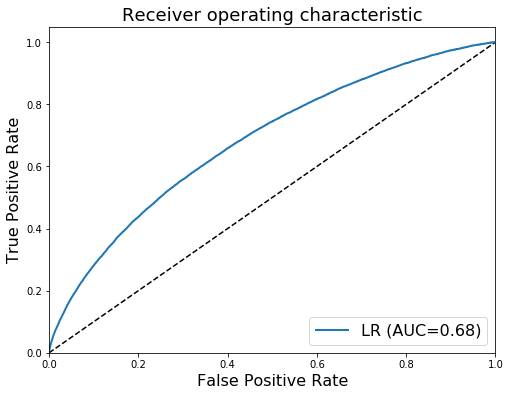

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(target, stack.y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

As can be seen, the AUC score for the ensembled classifier built beats the scores of all the individual classifiers used to build it.

### Precision/Recall

Text(0.5,1,'2-class Precision-Recall curve: AP=0.09')

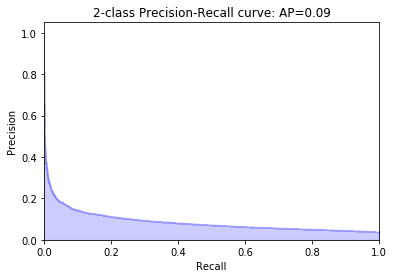

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(target, stack.y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
average_precision = average_precision_score(target, stack.y_pred)
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

The Precision/Recall curve is not very good, which is normal given how skewed the dataset is, the probability of a true claim being very small.